In [1]:
%store -r df2
%store -r df

In [1]:
import ipyparallel as ipp
import time

c=ipp.Client()

dview=c[:]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as k

In [3]:
df=pd.read_json("master_df.json")

In [4]:
df

,Target,Text,tokens,count,count2,diff
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, removing, drill, rod, jumbo, maintenan...",33,84,51
1,I,During the activation of a sodium sulphide pum...,"[during, activation, sodium, sulphide, pump, p...",26,59,33
2,I,In the sub-station MILPO located at level +170...,"[in, level, collaborator, excavation, work, pi...",23,62,39
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[being, approximately, personnel, task, unlock...",36,110,74
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approximately, mechanics, group, leader, eric...",27,100,73
...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[being, approximately, approximately, lifting,...",18,41,23
421,I,The collaborator moved from the infrastructure...,"[the, collaborator, infrastructure, office, ju...",19,43,24
422,I,During the environmental monitoring activity i...,"[during, environmental, activity, area, employ...",18,49,31
423,I,The Employee performed the activity of strippi...,"[the, employee, activity, stripping, cathode, ...",17,36,19


In [5]:
df_main=df[["Target","tokens"]]

In [6]:
df_main["tokens"]

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [in, level, collaborator, excavation, work, pi...
3      [being, approximately, personnel, task, unlock...
4      [approximately, mechanics, group, leader, eric...
                             ...                        
420    [being, approximately, approximately, lifting,...
421    [the, collaborator, infrastructure, office, ju...
422    [during, environmental, activity, area, employ...
423    [the, employee, activity, stripping, cathode, ...
424    [at, assistant, floor, module, e, central, cam...
Name: tokens, Length: 425, dtype: object

In [7]:
df_main["Target"]

0       I
1       I
2       I
3       I
4      IV
       ..
420     I
421     I
422     I
423     I
424     I
Name: Target, Length: 425, dtype: object

In [8]:
Maximum_desc_length=45 # This is a Tunable parameters based on the Scalability of the model
Embedding_dimensions=25 # This is a Tunable Hyper-parameter based on the Scalability of the model

# Creating Word Vocabulary

This can always be and should be updated based on the scalability and the data at hand. Hoping that we continue with the model we already have.

In [9]:
from nltk.util import flatten
vocab=set(flatten(list(df_main["tokens"])))

In [10]:
vocab_dict={word:key+1 for key,word in enumerate(vocab)} #0 is used for padding

In [11]:
vocab_dict.update({0:0})

In [12]:
pd.Series(vocab_dict)

test              1
comfort           2
scaler            3
crosscutter       4
pouring           5
               ... 
unclog         1971
protective     1972
thus           1973
resistance     1974
0                 0
Length: 1975, dtype: int64

In [13]:
def word2idx(text_list,vocabulary=vocab_dict):
    import numpy as np
    index=[]
    for each in text_list:
        index.append(vocabulary[each])
    return np.array(index)
        
    

In [14]:
dview.push(dict(vocabulary=vocab_dict))

<AsyncResult: _push>

In [15]:
X=dview.map_sync(word2idx,df_main["tokens"])
#df_main["word_index"]=

In [16]:
X

[array([  95,  180,  392,  137, 1430,  591,  258, 1333, 1087,  609, 1249,
          59,  976, 1463,  745, 1880, 1811, 1437,  392,  228,  238, 1089,
         451, 1463, 1829, 1089, 1171,  609, 1880, 1920, 1089,   12, 1430]),
 array([1176,  677, 1651,  885,   75,  892,  698, 1706,  856, 1739,  369,
         477,  201, 1912, 1258, 1529,  514,  876,  305,   84, 1412,  351,
         509,  885, 1706,  217]),
 array([ 890,  381, 1224, 1535, 1006, 1133,  234,  337,  423,  706, 1670,
         913, 1175,  141, 1819,  162, 1688, 1739, 1294,  395, 1224,   49,
        1923]),
 array([ 304, 1414, 1024,    8, 1334,  853,  524,  164,  163, 1807, 1695,
         704,   62, 1633, 1325, 1251,  142, 1805,  234,  336, 1213,  382,
        1185,  164,   44,  523,  770,   57,  617, 1213,  164,  938, 1294,
         234,   49, 1923]),
 array([1414, 1581,  132, 1937,  128,  592, 1732, 1463,  661, 1090,   75,
         627,  230,  282, 1881,  702,  661, 1087, 1628,  409,  222,   23,
         807,  395,  253,   49, 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input
maxlen=Maximum_desc_length


In [18]:
X=pad_sequences(X,maxlen=maxlen) # This is the perfectly padded Sequence for Analysis.

In [19]:
X

array([[   0,    0,    0, ..., 1089,   12, 1430],
       [   0,    0,    0, ...,  885, 1706,  217],
       [   0,    0,    0, ..., 1224,   49, 1923],
       ...,
       [   0,    0,    0, ...,  404, 1294,  234],
       [   0,    0,    0, ...,  404, 1294,  234],
       [   0,    0,    0, ..., 1892,  760, 1923]], dtype=int32)

In [20]:
X.shape[1]

45

In [21]:
levels_dict={"I":1,"II":2,"III":3,"IV":4,"V":5,"VI":6}

y=pd.get_dummies(df_main["Target"]) # This is out Target
y["VI"]=np.zeros(y.shape[0]).astype("int")
y

,I,II,III,IV,V,VI
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
420,1,0,0,0,0,0
421,1,0,0,0,0,0
422,1,0,0,0,0,0
423,1,0,0,0,0,0


In [22]:
vocab_size2=len(vocab_dict) 
embedding_dimensions= Embedding_dimensions
length_of_sequence=X.shape[1]

embedding_layer=Embedding (vocab_size2,
                           embedding_dimensions,
                           trainable=True,
                          input_length=length_of_sequence)

input_sequences=Input(shape=(None,),dtype="int64")
k=embedding_layer(input_sequences)

2021-09-04 00:07:14.077039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 00:07:14.082728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 00:07:14.083105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 00:07:14.083813: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [23]:
k

<KerasTensor: shape=(None, None, 25) dtype=float32 (created by layer 'embedding')>

# Normal LSTM Model

In [24]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

lstm_out = 48

#k=SpatialDropout1D(0.4)(k)
#k=Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))(k)
k=LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)(k)
k=Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))(k)
outputs=Dense(6,activation="softmax",kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(k)
model=Model(inputs=input_sequences,outputs=outputs)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 25)          49375     
_________________________________________________________________
lstm (LSTM)                  (None, 48)                14208     
_________________________________________________________________
dense (Dense)                (None, 12)                588       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
Total params: 64,249
Trainable params: 64,249
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history=model.fit(X,y,validation_split=0.2,epochs=30,batch_size=10)

2021-09-04 00:07:21.937241: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
 5/34 [===>..........................] - ETA: 1s - loss: 2.7631 - accuracy: 0.5600

2021-09-04 00:07:23.390217: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


34/34 [==============================] - 3s 51ms/step - loss: 2.3972 - accuracy: 0.7235 - val_loss: 1.9168 - val_accuracy: 0.7412
Epoch 2/30
34/34 [==============================] - 1s 43ms/step - loss: 1.8065 - accuracy: 0.7441 - val_loss: 1.7348 - val_accuracy: 0.7412
Epoch 3/30
34/34 [==============================] - 2s 45ms/step - loss: 1.6245 - accuracy: 0.7441 - val_loss: 1.5727 - val_accuracy: 0.7412
Epoch 4/30
34/34 [==============================] - 1s 44ms/step - loss: 1.4883 - accuracy: 0.7441 - val_loss: 1.4765 - val_accuracy: 0.7412
Epoch 5/30
34/34 [==============================] - 1s 44ms/step - loss: 1.4018 - accuracy: 0.7441 - val_loss: 1.4113 - val_accuracy: 0.7412
Epoch 6/30
34/34 [==============================] - 2s 45ms/step - loss: 1.3230 - accuracy: 0.7441 - val_loss: 1.3587 - val_accuracy: 0.7412
Epoch 7/30
34/34 [==============================] - 1s 44ms/step - loss: 1.2152 - accuracy: 0.7441 - val_loss: 1.2986 - val_accuracy: 0.7412
Epoch 8/30
34/34 [======

### Accuracy Vs Epochs for Strength of the Model

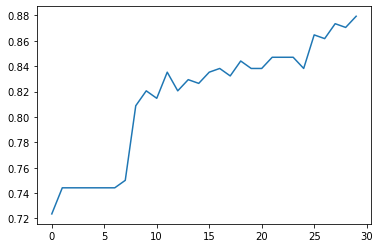

In [26]:
plt.plot(history.epoch,history.history["accuracy"]) # Epoch Vs Accuracy. Notice it is fading to pay off after 6 epochs

### Loss Vs Accuracy for scope of application of the model

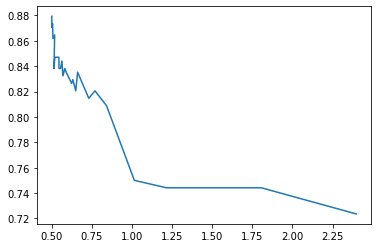

In [27]:
plt.plot(history.history["loss"],history.history["accuracy"]) # Loss Vs Accuracy plot (Not much in this)

# Bidirectional LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

lstm_out = 48
model2=Sequential()
model2.add(Embedding(vocab_size2,embedding_dimensions,trainable=True,input_length=length_of_sequence))
model2.add(SpatialDropout1D(0.4))
model2.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True, recurrent_dropout=0.2)))
model2.add(LSTM(48, dropout=0.2,unroll=True,recurrent_dropout=0.2))
model2.add(Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model2.add(Dense(6,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())
history2=model2.fit(X,y,validation_split=0.2,batch_size=15,epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 25)            49375     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 45, 25)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 45, 96)            28416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 48)                27840     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
Total params: 106,297
Trainable params: 106,297
Non-trainable params: 0
__________________________________________________

In [ ]:
#dir(history)

### Accuracy Vs Epochs for Strength of the Model

In [ ]:
plt.plot(history2.epoch,history2.history["accuracy"]) # Epoch Vs Accuracy. Notice it is fading to pay off after 6 epochs

### Loss Vs Accuracy for scope of application of the model

In [ ]:
plt.plot(history2.history["loss"],history2.history["accuracy"]) # Loss Vs Accuracy plot (Not much in this)

**Observations**

1. Model is refusing to learn beyond a certain point. So, it means that saturation point for the model has reached. So, there needs some experimentation w.r.t hyper-parameters or the model itself has to change.
2. It is noticed that rate of initial learning is extremely fast, most probably indicating that Model will most likely be an overfit for the kind of data at hand at present and future scope of data. This implies model needs to be a lot more simplified in the sense that paramters, LSTM layers (as guessed before) will have to be reduced and attempted again.
3. As we have seen before certain words are holding special interest, so Attention mechanism can be deployed here for testing and evaluating purposes.

# Preliminary Analysis of Models

1. It has been noted that preliminary training on the network model is not yeilding accuracy beyond 74 %. There needs to be a lot more deeper exploration into the model parameters and increase/decrease layers or something with iterations until we find the sweet spot.
2. The first signs show that the model can definitely be improved with a few tweaks here and there. Tuning is required not change in model.
3. However, other models like BERT or other Attention mechanism models can be explored for feasibility and scalability if it is required.

# More Comments and Notes Below cell
